<a href="https://colab.research.google.com/github/joselvira/BiomecanicaPython/blob/master/Notebooks/Relacion_Posicion_Velocidad_Aceleracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relación entre posición, velocidad y aceleración

Jose Luis López Elvira ([enlace a más recursos en GitHub](https://github.com/joselvira/BiomecanicaPython))

Última modificación 02/08/2024

Para poder aprovechar las partes interactivas, pulsa el botón *Open in Colab*.

El movimiento de cualquier objeto se puede describir a partir de variables cinemáticas, entre ellas **la posición, la velocidad y la aceleración**.
Cada una de esas tres variables nos aporta un tipo de información concreta sobre el movimiento, y a la vez están íntimamente relacionadas entre sí.

La relación entre posición, velocidad y aceleración se establece a partir de cómo se comportan a lo largo del tiempo. En realidad, en un objeto que se mueve, si conocemos una de las tres podemos calcular las otras dos a partir de las operaciones matemáticas derivar e integrar, tal como se ve en la figura.

In [ ]:
from IPython.display import Image
Image(url="https://github.com/joselvira/BiomecanicaPython/raw/master/Imagenes/Relacion-Pos-Vel-Acel.png", height=400)

Para subir un peldaño en la escalera es necesario derivar, mientras que para bajar, hay que integrar. Por ejemplo, si tenemos datos de la posición de un jugador de fútbol moviéndose por el campo, al derivar esos datos obtendremos la velocidad del jugador. Si derivamos nuevamente los datos que hemos obtenido de velocidad, entonces obtendremos la aceleración. Y si integráramos la aceleración obtenida volveríamos a tener primero la velocidad, y después la posición con la que partíamos inicialmente.

Esto es así porque **la velocidad mide cómo cambia la posición a lo largo del tiempo**, es decir, *la pendiente* en una gráfica posición/tiempo, y eso es precisamente lo que se calcula con la derivada. Y la misma relación que se encuentra entre la velocidad y la posición, se da entre la aceleración y la velocidad, porque **la aceleración mide cómo cambia la velocidad a lo largo del tiempo**.

Por el contrario, la integral es la operación matemática inversa a la derivada (representa el área que queda por debajo de una curva). Por ejemplo, la integral de un conjunto de datos de velocidad que cambian a lo largo del tiempo, gráficamente representa el área que queda por debajo de la gráfica velocidad/tiempo, y eso es exactamente la posición.

Vamos a probarlo con algún ejemplo. A continuación vemos una forma de modelar la curva velocidad / tiempo en una carrera de 100 m.l. para tener datos con los que jugar.

En primer lugar importamos librerías de uso habitual.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

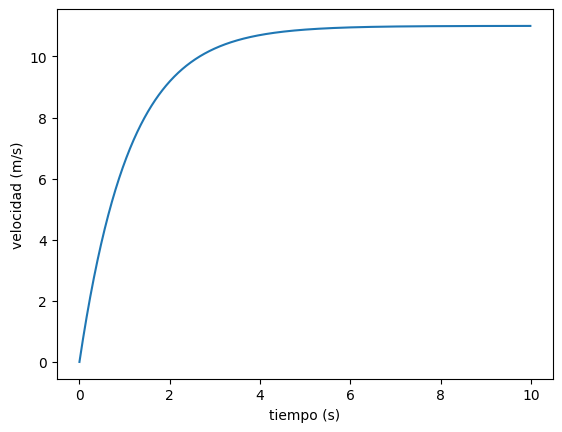

In [3]:
# Curva similar a velocidad en 100 m
dt = 0.01
t = np.arange(0, 10, dt) # crea un array de datos de tiempo de 10 s, con intervalos de 0.01 s
p1 = 11 # velocidad máxima
p2 = 0.9 #+-aceleración
offset = p1*np.e**(-p2*0) # ajuste para cambiar el offset de la gráfica y que sea positiva

# Modela la curva de velocidad
v = -p1*np.e**(-p2*t) + offset

# Crea la gráfica
plt.plot(t, v)
plt.xlabel('tiempo (s)')
plt.ylabel('velocidad (m/s)')
plt.show()

Para obtener la aceleración de la carrera, simplemente derivamos la variable de la velocidad.

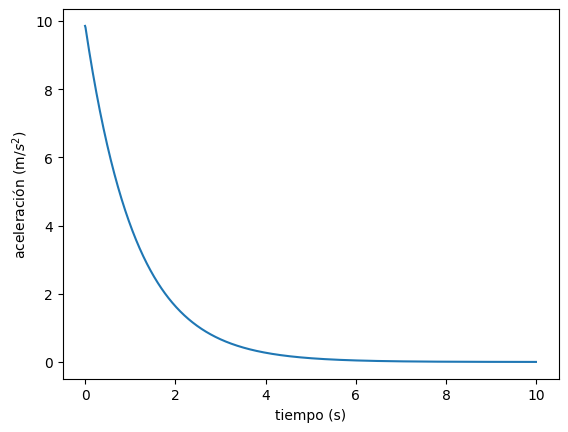

In [4]:
a=np.gradient(v)/dt

#Crea la gráfica
plt.plot(t, a)
plt.xlabel('tiempo (s)')
plt.ylabel('aceleración (m/$s^2$)')
plt.show()

Y para obtener la posición, simplemente integramos la velocidad.

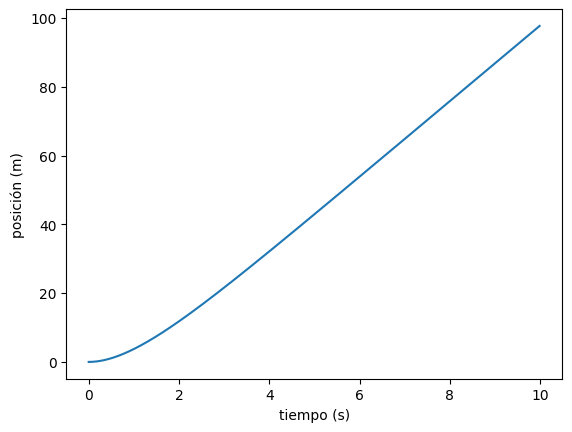

In [9]:
import scipy.integrate
p = scipy.integrate.cumulative_trapezoid(v, t, initial=0)

#Crea la gráfica
plt.plot(t, p)
plt.xlabel('tiempo (s)')
plt.ylabel('posición (m)')
plt.show()

¿Y qué pasa si la velocidad la integramos y después el resultado lo derivamos?

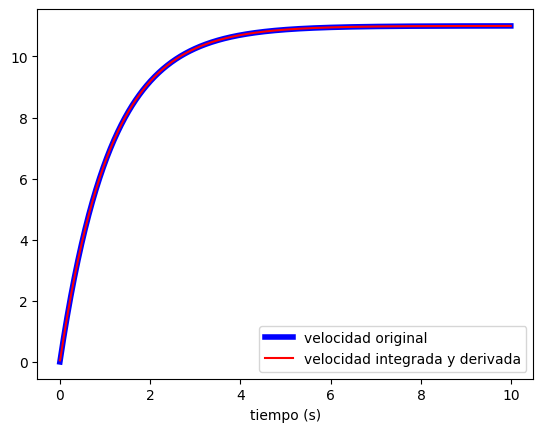

In [10]:
#Integral de la velocidad
integralV = scipy.integrate.cumulative_trapezoid(v, t, initial=0)

#Derivamos el resultado de la integral
derivada_integralV = np.gradient(integralV)/dt

#Gráfica de la velocidad original y de la integrado-derivado
plt.plot(t, v, lw=4, color='blue', label='velocidad original')
plt.plot(t, derivada_integralV, color='red', label='velocidad integrada y derivada')
plt.xlabel('tiempo (s)')
plt.legend()
plt.show()

¡SALE LO MISMO! Esto es así porque integrar y derivar son operaciones opuestas, igual que sumar y restar, multiplicar y dividir, etc. Si se hace una operación y la opuesta, vuelves al resultado original.

# Creadora de gráficas aleatorias

A continuación puedes generar movimientos creados aleatoriamente en los que se crean las gráficas de posición, velocidad y aceleración para que observes las relaciones que se crean entre las tres variables.

Los aspectos críticos en los que hay que fijarse son, qué pasa con las otras variables cuando una de ellas:

* Pasa por el cero.
* Aumenta.
* Disminuye.
* Se encuentra en un máximo local.
* Se encuentra en un mínimo local.

Para crear una nueva gráfica de posición, pulsa sobre el botón "Play" en la parte superior izquierda de la siguiente celda.

A partir de ahí, cada vez que ejecutes la celda, se creará una curva de posición aleatoria. Intenta analizar esa curva e identificar cómo sería el signo de la velocidad y aceleración en cada parte del movimiento.

Una vez lo tengas claro y quieras corregirlo, pulsa sobre el botón "Play" de la celda 2). Se crearán simultáneamente las gráficas de Posición, Velocidad y Aceleración del mismo movimiento anterior.
Las líneas verticales verdes indican cuándo la velocidad corta por el cero, que coincide con picos o valles de la posición.

Las líneas verticales azules indican cuándo la aceleración corta por el cero, que coincide con picos o valles de la velocidad.

Puedes guardar las gráficas pulsando con el botón derecho del ratón sobre la gráfica y seleccionando "Guardar imagen como..."

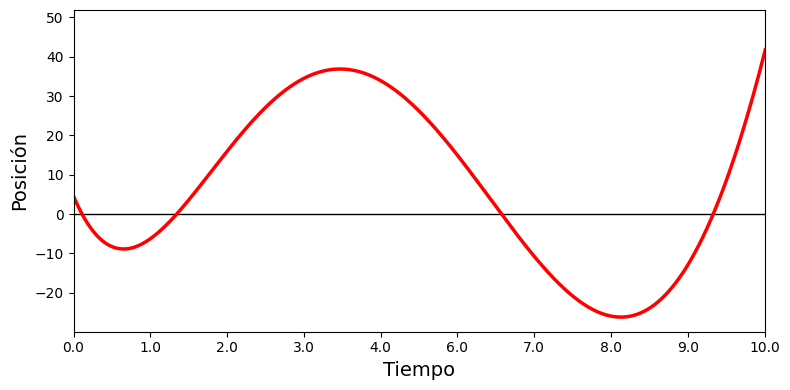

In [11]:
#@title 1) Pulsa en el botón "Play" que hay justo a la izquierda para crear una gráfica de posición aleatoria.
import sys
#La primera vez carga las librerías e instala detecta
if not 'detecta' in sys.modules:
  !pip install detecta
  from detecta import detect_onset
  import matplotlib.pyplot as plt
  import numpy as np
  from scipy import interpolate

#import os
#import time
#sys.path.insert(1, r'J:\Programacion\Python\Mios\Functions')  # add to pythonpath
#from tnorm import tnorm #para normalizar series de datos
#from detect_onset import detect_onset


# =============================================================================
# Define condicionales
# =============================================================================
bGraficasPruebas = False
bGraficaCompleta = True #Crea la figura con todas las gráficas limpias
bDatosInicialesAMano = False #si es false, los saca aleatorios
bCalculoInterpolando = False #interpolando requiere de separaciones iguales en eje X.; Si es falso, calcula la curva de ajuste con el grado que se indique.
# =============================================================================

numGraficas = 1
numDatos = 1000
nExtrapolacion = 10 #datos en X antes y después de la ventana visible
rangoY = 100 #Rango variable en el eje Y
gradoPolin = 5
rangoDatosInicial = [7,12]
colorVar = [[1,0,0], [0,1,0], [0,0,1]] #por orden P, V, A

# =============================================================================
# Empieza a procesar todas las gráficas
# =============================================================================
for nGraf in range(numGraficas):
    if bDatosInicialesAMano:
        #Entrada de datos X e Y a mano
        data = np.array([
               [-nExtrapolacion,  85.91247806],
               [185, 150],
               [207,  189.73686096],
               [304, 124.91312292],
               [367,  42.68889048],
               [468,  74.26467954],
               [numDatos+nExtrapolacion,  74.26467954],
               ])
        x = data[:,0]
        y = data[:,1]


    #Datos aleatorios de puntos clave
    else:
        #np.random.seed(1234)
        n = np.random.randint(rangoDatosInicial[0], rangoDatosInicial[1])
        #x = np.arange(0,100, 10)
        x = np.linspace(-nExtrapolacion,numDatos+nExtrapolacion,n)
        y = np.random.rand(len(x))*rangoY-rangoY/2


    #Variable tiempo
    t = np.linspace(min(x), max(x), numDatos+2*nExtrapolacion)
    dt = t[1]-t[0]

    #################################
    #Calcula Desplazamiento

    if bCalculoInterpolando:
        P, tn, indie = tnorm(y, k=4, step=-(numDatos+2*nExtrapolacion), smooth=0, show=bGraficasPruebas)
        #interp = interpolate.interp1d(x, y, kind='cubic') #otras opciones de interpolar son: 'nearest', 'zero', 'slinear', 'quadratic', 'cubic'
        P = interp(t)


        # spline = interpolate.splrep(x, y)
        # D = interpolate.splev(t, spline, der=0)

    else:
        from sklearn.pipeline import Pipeline
        from sklearn.preprocessing import PolynomialFeatures
        from sklearn.linear_model import LinearRegression

        polynomial_features = PolynomialFeatures(degree=gradoPolin, include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
        pipeline.fit(x[:, np.newaxis], y)

        P = pipeline.predict(t[:, np.newaxis])
        P_predict = pipeline.predict(x[:, np.newaxis]) #Calcula puntos de la predicción en las posiciones de X

    if bGraficasPruebas:
        plt.plot(t,P)
        #plt.plot(x,P_predict, 'ro')
        plt.plot(x, y, 'bo')
        plt.show()

    #################################

    #Calcula velocidad
    V = np.gradient(P) / dt

    #Calcula aceleración
    A = np.gradient(V) / dt


    ######################################
    #Busca cortes por el cero en velocidad
    indV = detect_onset(V, 0.0, n_above=2, n_below=0, show=False) #empieza a buscar desde que iniciamos la medida del peso
    indV=indV.flatten()-nExtrapolacion #ajusta restando el margen que se pone para que empieze ya con vovimiento

    #Busca cortes por el cero en aceleración
    indA = detect_onset(A, 0.0, n_above=2, n_below=0, show=False) #empieza a buscar desde que iniciamos la medida del peso
    indA=indA.flatten()-nExtrapolacion #ajusta restando el margen que se pone para que empieze ya con vovimiento

    # =============================================================================
    # %%Figuras de pruebas
    # =============================================================================
    if bGraficasPruebas:
        fig, ax = plt.subplots(figsize=(6, 4))
        plt.plot(x, y, 'bo')
        plt.plot(t, D, c=colorVar[0], lw=2, label='D')
        ax2 = ax.twinx() #crea el segundo eje
        ax2.plot(t, V, c=colorVar[1], lw=2, label='V')
        ax2.plot(t, A*10, c=colorVar[2], lw=2, label='A')

        plt.xlabel("tiempo", fontsize=15)

        plt.xlim((-nExtrapolacion, numDatos+nExtrapolacion))
        plt.legend(loc='best')
        plt.show()



    # =============================================================================
    # %%figura limpia
    # =============================================================================
    if bGraficaCompleta:
        #Figura con la gráficas de posición
        fig, ax = plt.subplots(figsize=(8, 4), sharex=True)#, dpi=200)
        #ax.plot(x, y, 'ro', lw=2)
        ax.plot(t, P, c=colorVar[0], lw=2.5)
        ax.axhline(y=0.0, color='k', lw=1, zorder=1)
        ax.set_ylabel('Posición', fontsize=14)
        ax.set_xlabel('Tiempo', fontsize=14)


        plt.xlim((0, numDatos))

        #sustituye las etiquetas del eje X para que se ajusten de 0 a 10
        plt.xticks(np.linspace(0, 1000, 10), np.round(np.linspace(0, 10, 10),0))

        plt.tight_layout()
        plt.show()



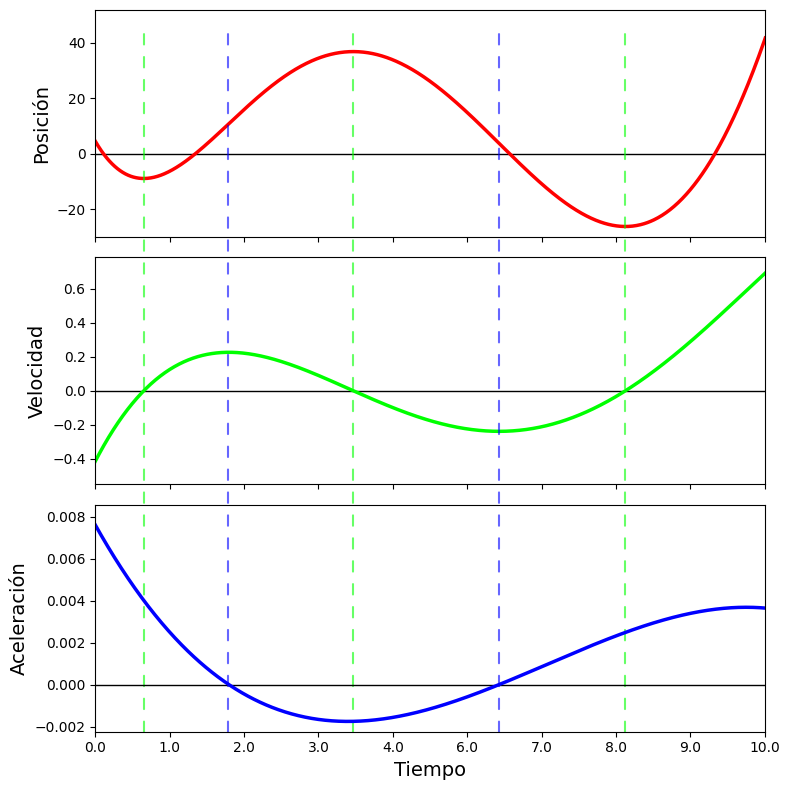

In [12]:
#@title 2) Pulsa en el botón "Play" que hay justo a la izquierda para ver las curvas de velocidad y aceleración asociadas a la misma gráfica de posición.
# =============================================================================
# %%figura limpia
# =============================================================================
#Figura con las tres gráficas juntas
fig, ax = plt.subplots(3,1,figsize=(8, 8), sharex=True)#, dpi=200)
#ax[0].plot(x, y, 'ro', lw=2)
ax[0].plot(t, P, c=colorVar[0], lw=2.5)
ax[0].axhline(y=0.0, color='k', lw=1, zorder=1)
ax[0].set_ylabel('Posición', fontsize=14)

ax[1].plot(t, V, c=colorVar[1], lw=2.5)
ax[1].axhline(y=0.0, color='k', lw=1, zorder=1)
ax[1].set_ylabel('Velocidad', fontsize=14)

ax[2].plot(t, A, c=colorVar[2], lw=2.5)
ax[2].axhline(y=0.0, color='k', lw=1, zorder=1)
ax[2].set_ylabel('Aceleración', fontsize=14)
ax[2].set_xlabel('Tiempo', fontsize=14)

#Dibuja líneas división según cortes por cero de la velocidad
for i in indV[(indV>0) & (indV<numDatos-nExtrapolacion)]: #dibuja solo los que están dentro de la gráfica
    ax[2].axvline(x=i, ymin=0, ymax=3.115, c=colorVar[1], ls='--', linewidth=1.5, alpha=0.6, dash_capstyle='round', dashes=(5, 6), zorder=0, clip_on=False)

for i in indA[(indA>0) & (indA<numDatos-nExtrapolacion)]:
    ax[2].axvline(x=i, ymin=0, ymax=3.115, c=colorVar[2], ls='--', linewidth=1.5, alpha=0.6, dash_capstyle='round', dashes=(5, 6), zorder=0, clip_on=False)

plt.xlim((0, numDatos))

#sustituye las etiquetas del eje X para que se ajusten de 0 a 10
plt.xticks(np.linspace(0, 1000, 10), np.round(np.linspace(0, 10, 10),0))

plt.tight_layout()
plt.show()
